In [71]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

## Types of Sparse Matrices

* **Coordinate List (COO):** a list of (row, col, val) tuples. Probably the most intuitive approach.


* **Dictionary of Keys (DOK):** a map of non-zero values indexed by (row, col) pairs. Under the hood, the index is basically a hash table, which has a $O(N)$ time complexity when searching an element, but might use up lots of memory.


* **Linked List (LIL):** a jagged array of rows, where each row is a list of (col, value) tuples. In many implementations, there are two lists holding the data indexed by row number.


* **Compressed Sparse Row (CSR):** the matrix is flattened by row, i.e. it is represented by three one-dimensional arrays usually called A (values), JA (indices), IA (index pointer). The first array stores the values of non-zero elements and has length NNZ. JA stores the column index of each element in the A array and has length NNZ. Finally, IA stores the cumulative number of non-zero elements up to the i-th row.


* **Compressed Sparse Column (CSC):** same as CSR but with column and row indices swapped. This is preferred approach when the matrix is used for column spicing.





In [24]:
A = np.array([
    [0, 0, 3, 0], 
    [0, 2, 0, 1],
    [0, 0, 0, 2],
    [1, 0, 0, 0]
])
print("A: \n", A, "\n")

A_coo = scipy.sparse.coo_matrix(A)
print("COO: \n", A_coo, "\n")

A_lil = scipy.sparse.lil_matrix(A)
print("LIL: \n", A_lil, "\n")

A_csr = scipy.sparse.csr_matrix(A)
print("CSR: \n", A_csr)

A: 
 [[0 0 3 0]
 [0 2 0 1]
 [0 0 0 2]
 [1 0 0 0]] 

COO: 
   (0, 2)	3
  (1, 1)	2
  (1, 3)	1
  (2, 3)	2
  (3, 0)	1 

LIL: 
   (0, 2)	3
  (1, 1)	2
  (1, 3)	1
  (2, 3)	2
  (3, 0)	1 

CSR: 
   (0, 2)	3
  (1, 1)	2
  (1, 3)	1
  (2, 3)	2
  (3, 0)	1


In [79]:
img = np.array([
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15],
    [16,17,18,19,20],
    [21,22,23,24,25]
])

Nx = img.shape[0]
Ny = img.shape[1]

print("Shape: (", Nx, ",", Ny, ")")

Shape: ( 5 , 5 )


In [62]:
def shift(xs, n):
    if n > 0:
        return np.concatenate((np.full(n, 0), xs[:-n]))
    elif n < 0:
        return np.concatenate((xs[-n:], np.full(-n, 0)))
    else:
        return xs

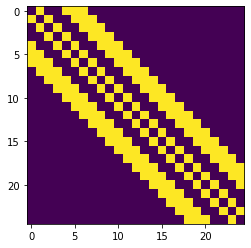

In [122]:
W = np.zeros((Nx*Ny, Nx*Ny))

A = np.zeros_like(img)
A[:3,:3] = 1
A_flattened = A.flatten()
shift_nums = np.arange(-1-Nx,Nx*(Ny-1)-1)

for i in range(Nx*Ny):
    W[:,i] = shift(A_flattened, shift_nums[i])
    
np.fill_diagonal(W, 0)

W_lil = scipy.sparse.lil_matrix(W)

plt.imshow(W)


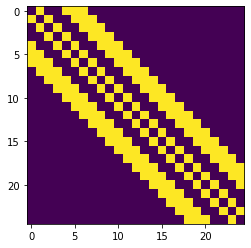

In [125]:
rows = np.concatenate([
    np.arange(Nx*Ny-1),
    np.arange(Nx*Ny-4), 
    np.arange(Nx*Ny-5), 
    np.arange(Nx*Ny-6)
])
cols = rows + np.concatenate([
    np.ones(Nx*Ny-1),
    4*np.ones(Nx*Ny-4),
    5*np.ones(Nx*Ny-5),
    6*np.ones(Nx*Ny-6)
]).astype(int)

data = np.ones_like(cols)

W_csr = scipy.sparse.csr_matrix((data, (rows, cols)), shape=(Nx*Ny,Nx*Ny))
W_csr = W_csr.T + W_csr

plt.imshow(W_csr.toarray())

In [181]:
f = plt.imread("cman.tif") / 255.0

rs = np.random.RandomState(5)
n = rs.randn(f.shape[0], f.shape[1])*0.1
y = f + n

In [213]:
Theta = 0.1
K = 1e-5

Nx = y.shape[0]
Ny = y.shape[1]

rows = np.concatenate([
    np.arange(Nx*Ny-1),
    np.arange(Nx*Ny-4), 
    np.arange(Nx*Ny-5), 
    np.arange(Nx*Ny-6)
])
cols = rows + np.concatenate([
    np.ones(Nx*Ny-1),
    4*np.ones(Nx*Ny-4),
    5*np.ones(Nx*Ny-5),
    6*np.ones(Nx*Ny-6)
]).astype(int)

y_1d = y.flatten()
vertices1 = y_1d[rows]
vertices2 = y_1d[cols]
dists = np.abs(vertices1-vertices2)
data = np.exp(-(dists**2)/(2*(Theta**2)))*(dists>K)

W_csr = scipy.sparse.csr_matrix((data, (rows, cols)), shape=(Nx*Ny,Nx*Ny))
W_csr = W_csr.T + W_csr

In [180]:
img_exp = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
print(np.reshape(img_exp, (9)))

[1 2 3 4 5 6 7 8 9]


In [165]:
print(rows, "\n", cols)
i = 8
inds1 = np.stack((rows//5, rows%5), axis=1)
inds2 = np.stack((cols//5, cols%5), axis=1)

print(inds1)
print(inds2)
inds = np.stack((inds1, inds2), axis=2)
print(inds[0])
print(inds)

def process(f):
    f_flattened = f.flatten()
    inds1 = f_flattened[rows]
    inds2 = f_flattened[cols]
    

[    0     1     2 ... 65527 65528 65529] 
 [    1     2     3 ... 65533 65534 65535]
[[    0     0]
 [    0     1]
 [    0     2]
 ...
 [13105     2]
 [13105     3]
 [13105     4]]
[[    0     1]
 [    0     2]
 [    0     3]
 ...
 [13106     3]
 [13106     4]
 [13107     0]]
[[0 0]
 [0 1]]
[[[    0     0]
  [    0     1]]

 [[    0     0]
  [    1     2]]

 [[    0     0]
  [    2     3]]

 ...

 [[13105 13106]
  [    2     3]]

 [[13105 13106]
  [    3     4]]

 [[13105 13107]
  [    4     0]]]


In [ ]:
def gaussian_weight(dist, K, theta):
    return np.exp(-(dist**2)/(2*(Theta**2)))

def myfunc(x, y, f):
    dist = np.abs(f[i,j]-f[i,j-1])
    
    

In [ ]:


dist = np.abs(f[i,j]-f[i,j-1])
res = gaussian_weight(dist,K,Theta)
    

vfunc(rows, cols)